In [7]:
#%pip install --upgrade pip
%pip install "numpy>=1.18.5,<1.25.0"
%pip install tensorflow 
%pip install opencv-python --use-deprecated=legacy-resolver

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

In [9]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"C:\Users\sathvika\OneDrive\Desktop\Mini Project\Train",
                                          target_size=(250,250),
                                          batch_size = 32,
                                          class_mode = 'categorical')

validation_data = test.flow_from_directory(r"C:\Users\sathvika\OneDrive\Desktop\Mini Project\Test",
                                          target_size=(250,250),
                                          batch_size =32,
                                          class_mode = 'categorical')

Found 4880 images belonging to 4 classes.
Found 1856 images belonging to 4 classes.


In [4]:
validation_data.class_indices

{'DR': 0, 'Glaucoma': 1, 'Normal': 2, 'amd': 3}

In [10]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(250,250,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
#model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function

model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with 4 neuron

model.add(keras.layers.Dense(4,activation='softmax'))

In [11]:
class MulticlassTruePositives(tf.keras.metrics.Metric):
    def __init__(self, name='multiclass_true_positives', **kwargs):
        super(MulticlassTruePositives, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.reshape(tf.argmax(y_pred, axis=1), shape=(-1, 1))
        values = tf.cast(y_true, 'int32') == tf.cast(y_pred, 'int32')
        values = tf.cast(values, 'float32')
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, 'float32')
            values = tf.multiply(values, sample_weight)
        self.true_positives.assign_add(tf.reduce_sum(values))

    def result(self):
        return self.true_positives

    def reset_states(self):
        # The state of the metric will be reset at the start of each epoch.
        self.true_positives.assign(0.)

In [12]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.MeanIoU(num_classes=4),tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])


In [13]:
#steps_per_epoch = train_imagesize/batch_size

hist=model.fit_generator(train_dataset,
         steps_per_epoch = 152,
         epochs = 15,
         validation_data = validation_data

         )

C:\Users\sathvika\AppData\Local\Temp\ipykernel_17448\4120088329.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_dataset,


Epoch 1/15


152/152 [==============================] - 119s 756ms/step - loss: 1.0323 - accuracy: 0.4998 - mean_io_u_1: 0.3752 - precision_1: 0.8206 - recall_1: 0.2302 - auc_1: 0.7933 - val_loss: 0.8248 - val_accuracy: 0.6126 - val_mean_io_u_1: 0.3750 - val_precision_1: 0.8574 - val_recall_1: 0.3173 - val_auc_1: 0.8690
Epoch 2/15
152/152 [==============================] - 129s 849ms/step - loss: 0.8226 - accuracy: 0.6151 - mean_io_u_1: 0.3750 - precision_1: 0.7594 - recall_1: 0.4264 - auc_1: 0.8717 - val_loss: 0.8196 - val_accuracy: 0.6078 - val_mean_io_u_1: 0.3750 - val_precision_1: 0.7171 - val_recall_1: 0.4849 - val_auc_1: 0.8700
Epoch 3/15
152/152 [==============================] - 74s 490ms/step - loss: 0.7082 - accuracy: 0.6700 - mean_io_u_1: 0.3750 - precision_1: 0.7586 - recall_1: 0.5485 - auc_1: 0.9054 - val_loss: 0.7262 - val_accuracy: 0.6681 - val_mean_io_u_1: 0.3750 - val_precision_1: 0.7295 - val_recall_1: 0.5841 - val_auc_1: 0.8982
Epoch 4/15
152/152 [===================

In [14]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(250,250))

    plt.imshow(img1)

    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val[0][0] == 1:
        plt.xlabel("Diabetic Retinopathy",fontsize=30)
    elif val[0][1] == 1:
        plt.xlabel("Glaucoma",fontsize=30)
    elif val[0][2]==1:
        plt.xlabel("Normal",fontsize=30)
    elif val[0][3]==1:
        plt.xlabel("AMD",fontsize=30)


1/1 [==============================] - 1s 923ms/step
[[0. 0. 0. 1.]]


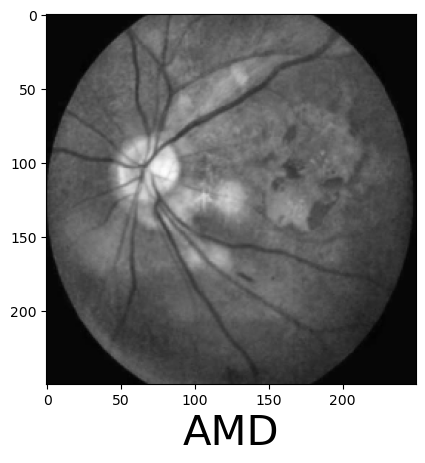

In [22]:
predictImage(r"C:\Users\sathvika\OneDrive\Desktop\Mini Project\prediction\amd\amd (20).jpg")

1/1 [==============================] - 0s 188ms/step
[[1. 0. 0. 0.]]


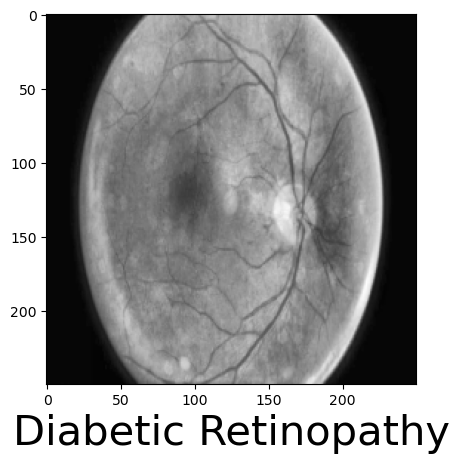

In [15]:
predictImage(r"C:\Users\sathvika\OneDrive\Desktop\Mini Project\prediction\DR\dr (80).jpg")

1/1 [==============================] - 0s 47ms/step
[[0. 0. 1. 0.]]


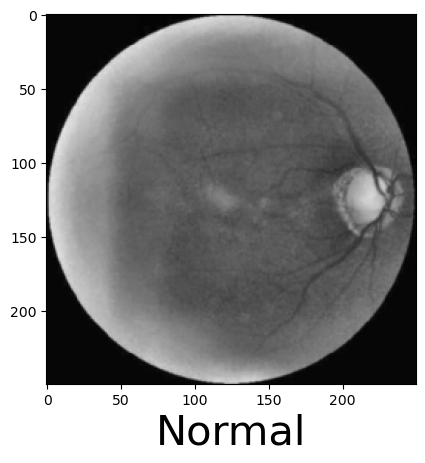

In [24]:
predictImage(r"C:\Users\sathvika\OneDrive\Desktop\Mini Project\prediction\Glaucoma\glaucoma (1).jpg")

1/1 [==============================] - 0s 29ms/step
[[0. 1. 0. 0.]]


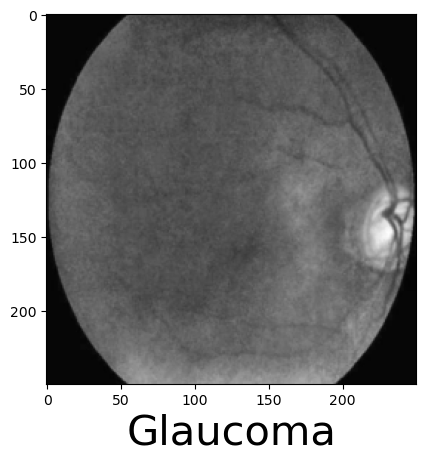

In [16]:
predictImage(r"C:\Users\sathvika\OneDrive\Desktop\Mini Project\prediction\Glaucoma\glaucoma (61).jpg")

1/1 [==============================] - 0s 29ms/step
[[0. 1. 0. 0.]]


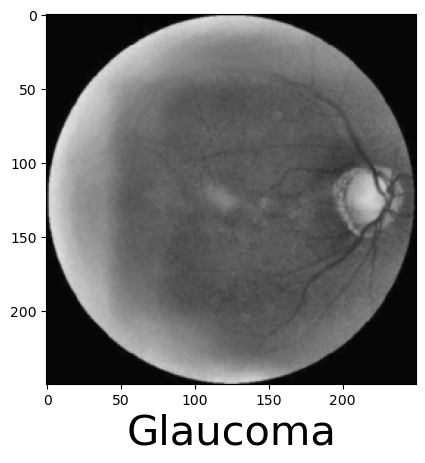

In [17]:
predictImage(r"C:\Users\sathvika\OneDrive\Desktop\Mini Project\prediction\Glaucoma\glaucoma (1).jpg")

1/1 [==============================] - 0s 37ms/step
[[0. 0. 0. 1.]]


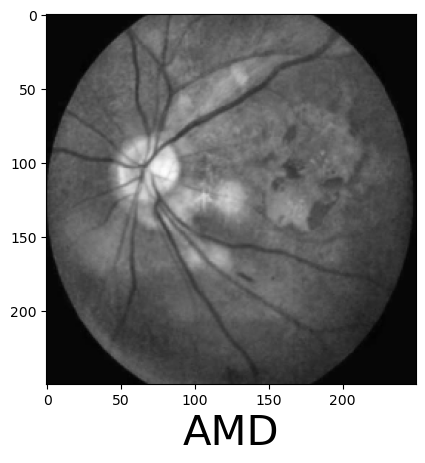

In [18]:
predictImage(r"C:\Users\sathvika\OneDrive\Desktop\Mini Project\prediction\amd\amd (20).jpg")

1/1 [==============================] - 0s 28ms/step
[[0. 0. 0. 1.]]


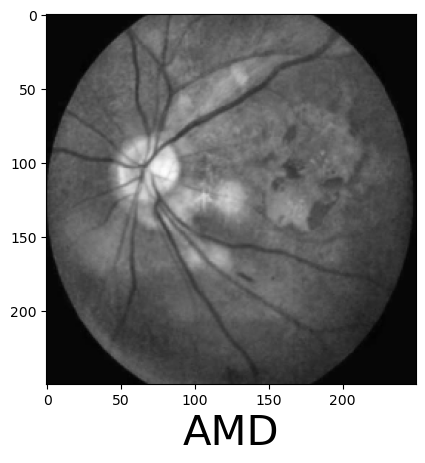

In [19]:
predictImage(r"C:\Users\sathvika\OneDrive\Desktop\Mini Project\prediction\amd\amd (20).jpg")